In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [ ]:
N=100
rng=0.5*(2*np.random.random(N)-1) #primer paréntesis: valores entre -1 y 1
b=2
x=np.linspace(0,10,N)
y=2.1*(x)+b+rng

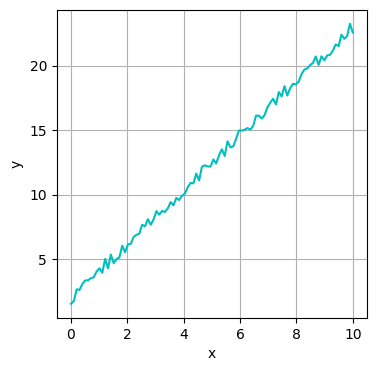

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(x,y,'c')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [ ]:
def fun(x,a,b):
  return a*x+b

params_fit=curve_fit(fun,x,y)

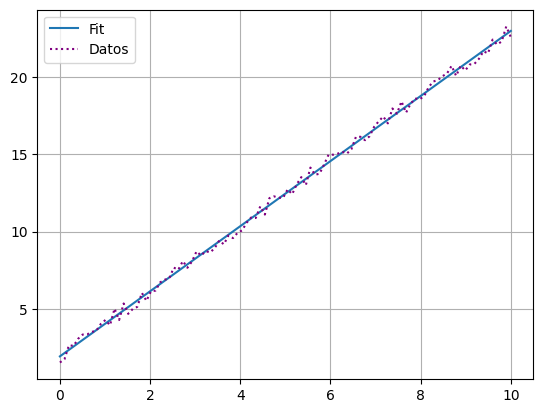

In [ ]:
x_=np.linspace(min(x),max(x),1000)
y_fit=fun(x_,*params_fit[0])
plt.plot(x_,y_fit,label='Fit')
plt.plot(x,y,color='purple',ls=':',label='Datos')
plt.legend()
plt.grid()

In [ ]:
file = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT1on46nfXC-sPxOXOPO-OXCDIFOdmJWhn_WLEMFDX8REAmfrkT3XwFNuaYxk4gz2FE1KEJo2oHrUyG/pub?output=csv'
df=pd.read_csv(file,sep=';',decimal='.')
df

,Tiempo (ms),"Ángulo 1,"
0,9,"59,289611816406"
1,42,"59,9823265075684"
2,75,"61,2374534606934"
3,108,"63,49247741699"
4,142,"65,3887710571289"
...,...,...
2842,94709,"94,9375762939453"
2843,94743,"96,479850769043"
2844,94776,"97,9406890869141"
2845,94809,"99,3180923461914"


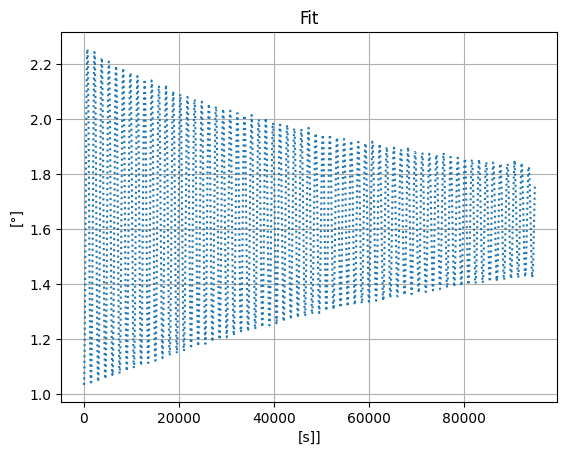

In [ ]:
df=df.rename(columns={'Tiempo (ms)':"Tiempo[ms]",'Ángulo 1,':'AnguloDeg'})

df.AnguloDeg=df.AnguloDeg.str.replace(',','.').astype(float)
df['AnguloRad']=np.deg2rad(df.AnguloDeg)
plt.plot(df['Tiempo[ms]'],df['AnguloRad'],ls='dotted')
plt.xlabel('[s]]')
plt.ylabel('[°]')
plt.title('Fit')
plt.grid()

In [ ]:
def funf(t, A, alpha, w, phi, cte):
  return A * np.exp(-alpha * t) * np.cos(w * t + phi) + cte

Nf = 100000
tf = 500000* np.random.random(Nf)
params = 2,1,0

In [ ]:
vec = curve_fit(funf,df['Tiempo[ms]'],df['AnguloRad'])
a = vec[0][0]
b = vec[0][1]
c = vec[0][2]

xf = np.linspace(min(df['Tiempo[ms]']), max(df['Tiempo[ms]']), Nf)
val = funf(xf, *vec[0])

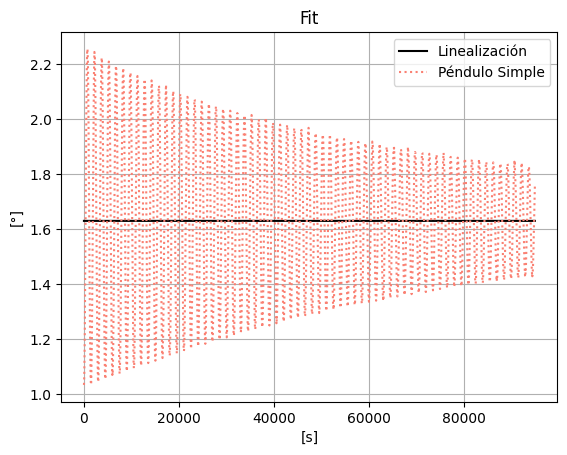

In [ ]:
plt.plot(xf, val, 'k', label = 'Linealización')
plt.plot(df['Tiempo[ms]'], df['AnguloRad'], color='salmon', ls='dotted', label = 'Péndulo Simple')
plt.xlabel('[s]')
plt.ylabel('[°]')
plt.title('Fit')
plt.legend()
plt.grid()